# Data Science: A Road to Safer Roads

### Dr Debdarsan Niyogi

#### 10th Sept, 2020

# Introduction
According to the statistics by WHO (7th Feb, 2020):

- Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.
- Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.
- Road traffic injuries are the leading cause of death for children and young adults aged 5-29 years.

This, therefore, needs serious attention, as it concerns human lives which is irreplacable. It is possible, thanks to machine learning, to predict severity of car accidents as a result of the complex interplay of multitudes of factors like weather, road condition, light condition, speeding etc. and also to identify which factors are more important. The information thus gathered can be used to take preventive measurements.

## Objective

In 2017, WHO released Save LIVES (a road safety technical package focuses on Speed management, Leadership, Infrastructure design and improvement, Vehicle safety standards, Enforcement of traffic laws and post-crash Survival) which synthesizes evidence-based measures that can significantly reduce road traffic fatalities and injuries.

While the pursuit of saving lives is obvious, the 2030 Agenda for Sustainable Development has set an ambitious and quantifiable goal of halving the global number of deaths and injuries from road traffic crashes by 2020.

According to the National Safety Council, traffic collisions cause more than 40,000 deaths and injure thousands of people every year across the United States. These are not traffic accidents, but entirely preventable tragedies.

In order to reduce accidents, we need to predict it based on the external parameters. Since the accident occurs due to very many factors (unsafe road infrastructure, light condition, vulnerable road users, speeding, driving under the influence of alcohol and other psychoactive substances, distracted driving, weather) prediction of accidental severity is a challenge. Machine Learning is ideally suited here as this is a scientific approach for modelling and predicting the parameter of interest demanding only a low budget.

The current project attempts to apply a machine learning technique to predict the severity of the accident given the parameters as stated before using car collision data for the city of Seattle, USA. Additionally, the accident data is extremely skewed (class imbalance), which makes the models heavily biased towards mild injuries. A practical methodology is used here to tackle this situation.


## Interests

The practical utilities of the prediction, besides saving lives:

- Safe route planning
- Emergency vehicle allocation
- Roadway design
- Reduce property damage
- Where to place additional signage (e.g. to warn for curves)

Study of accidents in one US city can definitely help any other city having similar characteristics. As car accidents are correlated to socioeconomic condition (according to WHO), the model developed cannot be used across countries but the same methodology can, of course, be utilised. The stakeholders of the present problem are federal, state and local government agencies, non-governmental organizations, regional authorities, and possible individuals (if this model is deployed as an app for personal use).

## Data

## Acquisition

The car collision data is obtained from Seattle Govt’s website (Timeframe: 2004 to Present).

Data Source: http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data

Data Catalogue: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

### Loading

As the dataset is huge, instead of loading the entire data set, one might load a percentage of total observations by random sampling, or shuffle the data and take first n rows. This will be useful to reduce the time required to train and test multiple ML models. Once we are satisfied with the results, we can load the entire data and determine the exact figures for the different performance evaluation matrices.

In [2]:
import numpy as np 
import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
# Data file name
filename = "Collisions.csv"

# Read the whole data file
df = pd.read_csv(filename, low_memory=False)

## ---------------------------------------------------------------------------------------------------------------
## Read first maxrows of data
## ---------------------------------------------------------------------------------------------------------------

## maxrows = 20000
## df = pd.read_csv(filename, nrows=nrows, skiprows=0, low_memory=False)

## ---------------------------------------------------------------------------------------------------------------
## Read percent_rows % of the data rows
## ---------------------------------------------------------------------------------------------------------------

#percent_rows = 0.50  # 20% of the lines
## keep the header, then take only 20% of lines
## if random from [0,1] interval is greater than 0.01 the row will be skipped

#df = pd.read_csv(filename,header=0, 
#         skiprows=lambda i: i>0 and np.random.random() > percent_rows, low_memory=False)

# shuffle the DataFrame rows 
#df = df.sample(frac = 1) 

#### Data Attributes

Listed below for convenience:

|Attribute|Data Type, Length|Description|
|:-|:-|:-|
|OBJECTID|ObjectID|ESRI unique identifier|
|SHAPE|Geometry|ESRI geometry field|
|INCKEY|Long|A unique key for the incident|
|COLDETKEY|Long|Secondary key for the incident|
|ADDRTYPE|Text, 12|Collision address type: Alley, Block, Intersection|
|INTKEY|Double|Key that corresponds to the intersection associated with a collision|
|LOCATION|Text, 255|Description of the general location of the collision|
|EXCEPTRSNCODE|Text, 10|Not specified|
|EXCEPTRSNDESC|Text, 300|Not specified|
|SEVERITYCODE|Text, 100|A code that corresponds to the severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown|
|SEVERITYDESC|Text|A detailed description of the severity of the collision|
|COLLISIONTYPE|Text, 300|Collision type|
|PERSONCOUNT|Double|The total number of people involved in the collision|
|PEDCOUNT|Double|The number of pedestrians involved in the collision. This is entered by the state.|
|PEDCYLCOUNT|Double|The number of bicycles involved in the collision. This is entered by the state.|
|VEHCOUNT|Double|The number of vehicles involved in the collision. This is entered by the state.|
|INJURIES|Double|The number of total injuries in the collision. This is entered by the state.|
|SERIOUSINJURIES|Double|The number of serious injuries in the collision. This is entered by the state.|
|FATALITIES|Double|The number of fatalities in the collision. This is entered by the state.|
|INCDATE|Date|The date of the incident.|
|INCDTTM|Text, 30|The date and time of the incident.|
|JUNCTIONTYPE|Text, 300|Category of junction at which collision took place|
|SDOT_COLCODE|Text, 10|A code given to the collision by SDOT.|
|SDOT_COLDESC|Text, 300|A description of the collision corresponding to the collision code.|
|INATTENTIONIND|Text, 1|Whether or not collision was due to inattention. (Y/N)|
|UNDERINFL|Text, 10|Whether or not a driver involved was under the influence of drugs or alcohol.|
|WEATHER|Text, 300|A description of the weather conditions during the time of the collision.|
|ROADCOND|Text, 300|The condition of the road during the collision.|
|LIGHTCOND|Text, 300|The light conditions during the collision.|
|PEDROWNOTGRNT|Text, 1|Whether or not the pedestrian right of way was not granted. (Y/N)|
|SDOTCOLNUM|Text, 10|A number given to the collision by SDOT.|
|SPEEDING|Text, 1|Whether or not speeding was a factor in the collision. (Y/N)|
|ST_COLCODE|Text, 10|A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.|
|ST_COLDESC|Text, 300|A description that corresponds to the state’s coding designation.|
|SEGLANEKEY|Long|A key for the lane segment in which the collision occurred.|
|CROSSWALKKEY|Long|A key for the crosswalk at which the collision occurred.|
|HITPARKEDCAR|Text, 1|Whether or not the collision involved hitting a parked car. (Y/N)|

#### Data Profile

In [5]:
#from pandas_profiling import ProfileReport

# Generate profile report
#profile = ProfileReport(df, title="Data Profile Report", explorative=True)
#profile.to_notebook_iframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221006 entries, 0 to 221005
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213539 non-null  float64
 1   Y                213539 non-null  float64
 2   OBJECTID         221006 non-null  int64  
 3   INCKEY           221006 non-null  int64  
 4   COLDETKEY        221006 non-null  int64  
 5   REPORTNO         221006 non-null  object 
 6   STATUS           221006 non-null  object 
 7   ADDRTYPE         217295 non-null  object 
 8   INTKEY           71728 non-null   float64
 9   LOCATION         216422 non-null  object 
 10  EXCEPTRSNCODE    100603 non-null  object 
 11  EXCEPTRSNDESC    11769 non-null   object 
 12  SEVERITYCODE     221005 non-null  object 
 13  SEVERITYDESC     221006 non-null  object 
 14  COLLISIONTYPE    194678 non-null  object 
 15  PERSONCOUNT      221006 non-null  int64  
 16  PEDCOUNT         221006 non-null  int6

Upon loading the data, we see that there are 40 variables and 2,21,006 number of observations.

## Initial Data Processing

Now we are ready to proceed towards data preparation methodically. Statistics show that Data Scientists spend almost 60% of their time in preparing data suitable for machine learning. This part is not very exciting but is still included here to point out what to look for in a huge and real data set.

#### Date-Time variables

To explore the date-time feature, let us extract the Month, Weekday, Hour information from INCDTTIME and add those as separate columns.

In [6]:
# Convert INCDTTM to date type

df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')

# Extract month, weekday, hour information

df['Month']=df['INCDTTM'].dt.month
df['Weekday']=df['INCDTTM'].dt.weekday
df['Hour']=df['INCDTTM'].dt.hour

Save intermediate data file.

In [7]:
# Export the intermediate semi-processed data file
filename = "Collisions_100_initial_processing_before_EDA.csv"
df.to_csv(filename,index=False)

# Exploratory Data Analysis (EDA) 

Now our data is relatively cleaner and lighter. In this phase we concentrate on Data visualization, Cleaning up missing data, Value imputation, Value re-grouping.

In [8]:
# Read the intermediate semi-processed data file
filename = "Collisions_100_initial_processing_before_EDA.csv"
df = pd.read_csv(filename)

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

## Inspect Severity Code

Severity Code (SEVERITYCODE) is the target/dependent variable. Let us scrutinize that first.

In [10]:
df['SEVERITYCODE'].value_counts(normalize=True, dropna=False).round(5)

1      0.62141
2      0.26528
0      0.09774
2b     0.01399
3      0.00158
NaN    0.00000
Name: SEVERITYCODE, dtype: float64

Since we are not going to predict an 'Unknown' severity (SEVERITYCODE = 0), these observations, along with the rows with missing values can safely be deleted. The categorical values can also be remapped to a scale of 1 to 4, where 3 is assigned to 4 and 2b to 3.

In [11]:
df['SEVERITYCODE'].replace('0', np.nan, inplace=True)

In [12]:
df.dropna(axis=0, how='any',thresh=None, subset=['SEVERITYCODE'], inplace=True)

Shift Severity 3 to 4 and 2b to 3

In [13]:
df['SEVERITYCODE'].replace('3', '4', inplace=True)
df['SEVERITYCODE'].replace('2b', '3', inplace=True)

In [14]:
df['SEVERITYCODE'] =  df['SEVERITYCODE'].astype('int64')
df['SEVERITYCODE'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

1    0.68873
2    0.29402
3    0.01551
4    0.00175
Name: SEVERITYCODE, dtype: float64

#### The new mapping is as follows:


|SEVERITYCODE|SEVERITYDESC|
|:-|:-|
|1|Property Damage Only Collision|
|2|Injury Collision|
|3|Serious Injury Collision|
|4|Fatality Collision|

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count of Accidents by Severity'}, xlabel='Severity Code', ylabel='Count'>

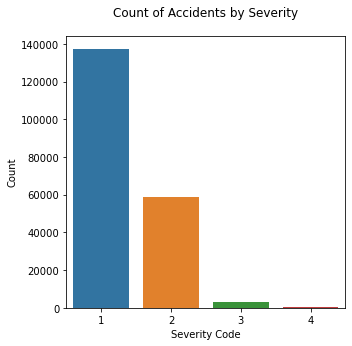

In [15]:
countseverity = df.SEVERITYCODE.unique()
count_by_severity=[]
for i in df.SEVERITYCODE.unique():
    count_by_severity.append(df.loc[df.SEVERITYCODE == i, 'SEVERITYCODE'].count())
fig, ax = plt.subplots(figsize=(5,5))
plt.title('Count of Accidents by Severity', y=1.05)
ax.set(xlabel='Severity Code', ylabel='Count')
sns.barplot(countseverity, count_by_severity)

## Inspect Date Time features

There are no missing values, as seen earlier.

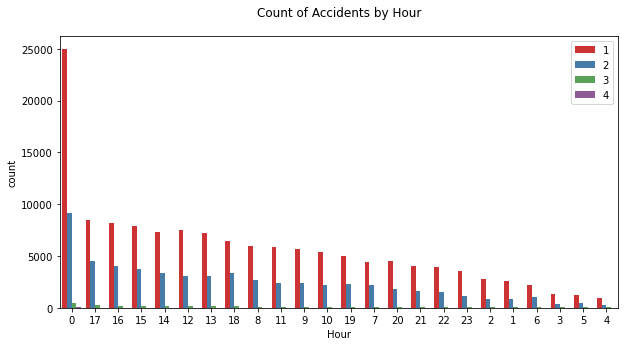

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', hue='SEVERITYCODE', data=df, order = df['Hour'].value_counts().index, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Hour', y=1.05)
plt.show()

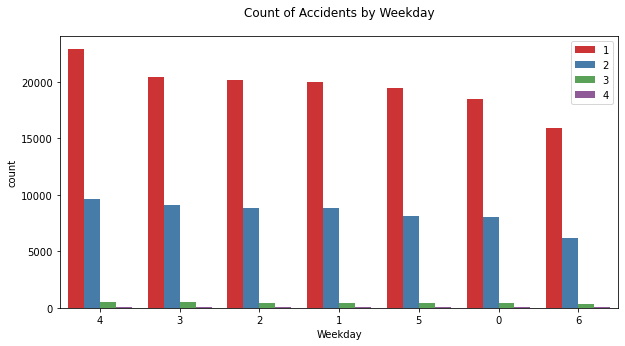

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='SEVERITYCODE', data=df, order = df['Weekday'].value_counts().index, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Weekday', y=1.05)
plt.show()

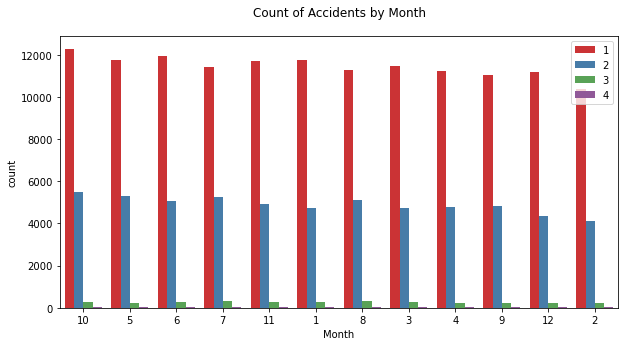

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='SEVERITYCODE', data=df, order = df['Month'].value_counts().index, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Month', y=1.05)
plt.show()

## Inspect Weather features

In the data profile report we have seen this contains missing values. Keeping that in mind let's see the distinct values:

In [19]:
df['WEATHER'].value_counts(dropna=False, ascending=False)

Clear                       114301
Raining                      34006
Overcast                     28495
Unknown                      15131
NaN                           4917
Snowing                        919
Other                          851
Fog/Smog/Smoke                 576
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

We subsitute missing values by 'Unknown'.

In [20]:
df.replace({'WEATHER' : {np.nan : 'Unknown'}}, inplace=True)

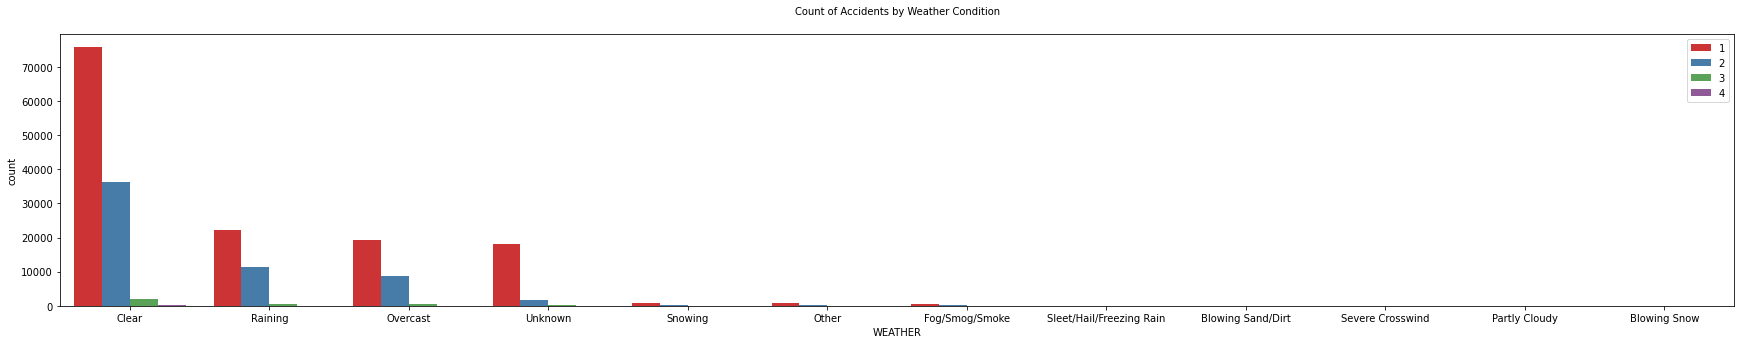

In [21]:
plt.figure(figsize=(30,5))
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df, order = df['WEATHER'].value_counts().index, palette="Set1")
plt.title('Count of Accidents by Weather Condition', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

## Inspect Collision Address Type

This denotes if the collision has taken place in a block, intersection or alley.

In [22]:
df['ADDRTYPE'].value_counts(normalize=True, ascending=False, dropna=False).round(5)

Block           0.64925
Intersection    0.33725
NaN             0.00968
Alley           0.00382
Name: ADDRTYPE, dtype: float64

We subsitute missing values by 'Unknown'.

In [23]:
df.replace({'ADDRTYPE' : {np.nan : 'Unknown'}}, inplace=True)

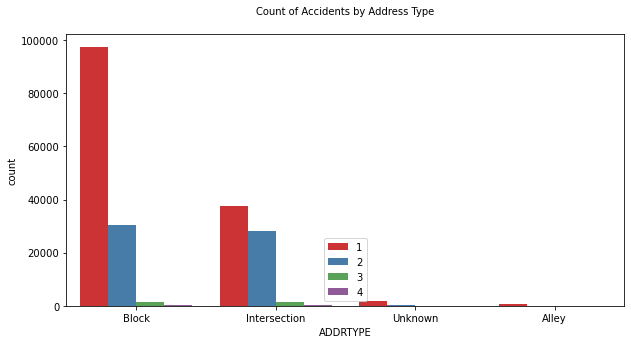

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df, order = df['ADDRTYPE'].value_counts().index,  palette="Set1")
plt.title('Count of Accidents by Address Type', size=10, y=1.05)
plt.legend(loc='best', prop={'size': 10})
plt.show()

## Inspect Collision Type

In [25]:
df['COLLISIONTYPE'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

Parked Car    0.24295
Angles        0.17774
Rear Ended    0.17356
Other         0.12293
Sideswipe     0.09453
Left Turn     0.07059
Pedestrian    0.03837
Cycles        0.02961
NaN           0.02371
Right Turn    0.01507
Head On       0.01093
Name: COLLISIONTYPE, dtype: float64

We substitute the missing values by 'Unknown' as above.

In [26]:
df.replace({'COLLISIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)

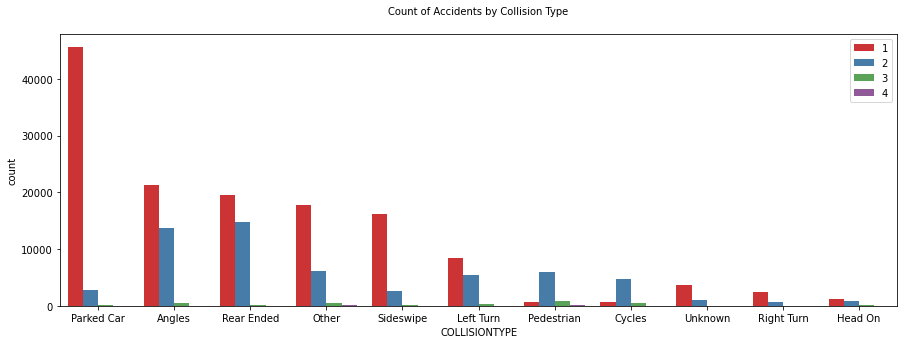

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE', data=df, order = df['COLLISIONTYPE'].value_counts().index,  palette="Set1")
plt.title('Count of Accidents by Collision Type', size=10, y=1.05)
plt.legend(loc='best', prop={'size': 10})
plt.show()

## Inspect Junction Type

In [28]:
df['JUNCTIONTYPE'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

Mid-Block (not related to intersection)              0.46073
At Intersection (intersection related)               0.32573
Mid-Block (but intersection related)                 0.11560
Driveway Junction                                    0.05440
NaN                                                  0.03197
At Intersection (but not related to intersection)    0.01067
Ramp Junction                                        0.00086
Unknown                                              0.00005
Name: JUNCTIONTYPE, dtype: float64

We replace the missing values by 'Unknown' and shorten the labels somewhat so that they are readable in the diagrams we are going to plot.

In [29]:
df.replace({'JUNCTIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)

In [30]:
df.replace({'JUNCTIONTYPE' : {'Mid-Block (not related to intersection)': 'Mid-Block (Not Intersect)', 
                              'At Intersection (intersection related)': 'At Intersection (Intersect)',
                              'Mid-Block (but intersection related)': 'Mid-Block (Intersect)',
                              'At Intersection (but not related to intersection)': 'At Intersection (Intersect)'}}, inplace=True)

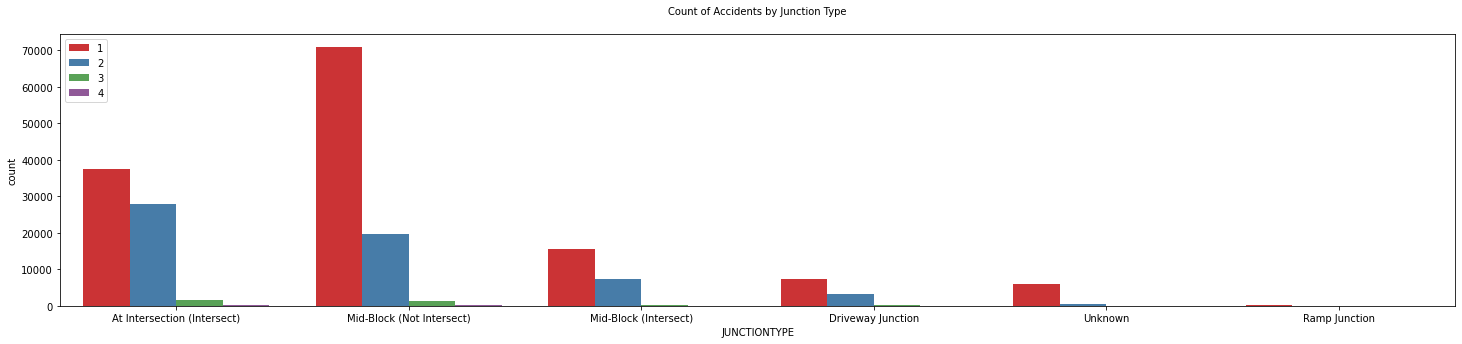

In [31]:
plt.figure(figsize=(25,5))
sns.countplot(x='JUNCTIONTYPE', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Junction Type', size=10, y=1.05)
plt.legend(loc='best', prop={'size': 10})
plt.show()

## Inspect under influence

The flag UNDERINFL indicates whether or not a driver involved was under the influence of drugs or alcohol, has ambigous data: 

In [32]:
df['UNDERINFL'].value_counts(normalize=True, ascending=False, dropna=False)

N      0.518505
0      0.409601
Y      0.027076
NaN    0.023605
1      0.021213
Name: UNDERINFL, dtype: float64

We can safely map 0 to 'N', 1 to 'Y' and NaN as 'Unknown'.

In [33]:
df.replace({'UNDERINFL' : {np.nan : 'Unknown', '0': 'N', '1': 'Y'}}, inplace=True)

In [34]:
df['UNDERINFL'].value_counts(normalize=True, ascending=False, dropna=False)

N          0.928106
Y          0.048289
Unknown    0.023605
Name: UNDERINFL, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Under Influence Flag'}, xlabel='Under Influence Flag', ylabel='Count'>

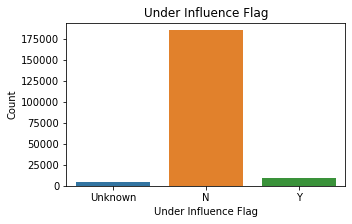

In [36]:
underinfluence = df.UNDERINFL.unique()
count_by_underinfluence=[]
for i in df.UNDERINFL.unique():
    count_by_underinfluence.append(df.loc[df.UNDERINFL == i, 'UNDERINFL'].count())
fig, ax = plt.subplots(figsize=(5,3))
ax.set(xlabel='Under Influence Flag', ylabel='Count', title='Under Influence Flag')
sns.barplot(underinfluence, count_by_underinfluence)

## Inspect Road Condition

In [37]:
df['ROADCOND'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

Dry               0.64242
Wet               0.24421
Unknown           0.07587
NaN               0.02426
Ice               0.00617
Snow/Slush        0.00509
Other             0.00068
Standing Water    0.00060
Sand/Mud/Dirt     0.00039
Oil               0.00032
Name: ROADCOND, dtype: float64

In [38]:
df.replace({'ROADCOND' : {np.nan: 'Unknown'}}, inplace=True)

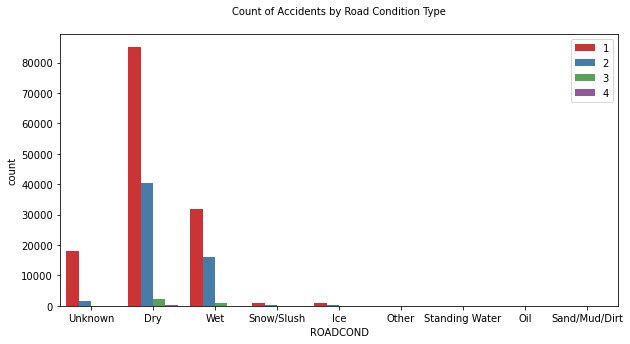

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Road Condition Type', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

## Inspect Light Conditions

In [40]:
df['LIGHTCOND'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

Daylight                    0.59724
Dark - Street Lights On     0.25097
Unknown                     0.06780
Dusk                        0.03046
NaN                         0.02510
Dawn                        0.01302
Dark - No Street Lights     0.00789
Dark - Street Lights Off    0.00620
Other                       0.00122
Dark - Unknown Lighting     0.00010
Name: LIGHTCOND, dtype: float64

In [41]:
df.replace({'LIGHTCOND' : {np.nan: 'Unknown'}}, inplace=True)

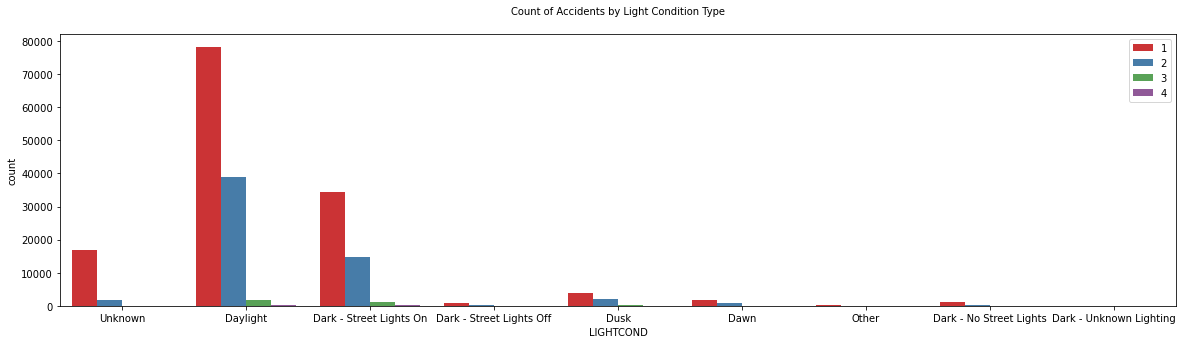

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Light Condition Type', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

## Inspect Hit Parked Car Flag

This flag is set to ‘Y’ if the collision involved hitting a parked car.

In [43]:
df['HITPARKEDCAR'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

N    0.96245
Y    0.03755
Name: HITPARKEDCAR, dtype: float64

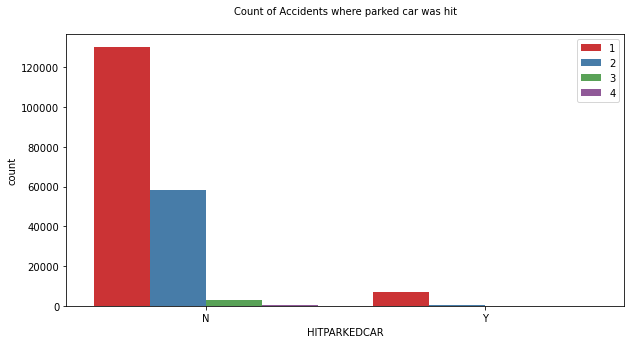

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='HITPARKEDCAR', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents where parked car was hit', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### Inspect Collision Codes

Code 31 is 'Not Stated'. So, we can replace the missing values by code '31'

In [45]:
df.replace({'ST_COLCODE' : {np.nan: '31', ' ': '31'}}, inplace=True)

In [46]:
df['ST_COLCODE'].value_counts(normalize=True, ascending=False,dropna=False).round(5).head()

32    0.22484
10    0.17774
14    0.13113
50    0.07075
11    0.06489
Name: ST_COLCODE, dtype: float64

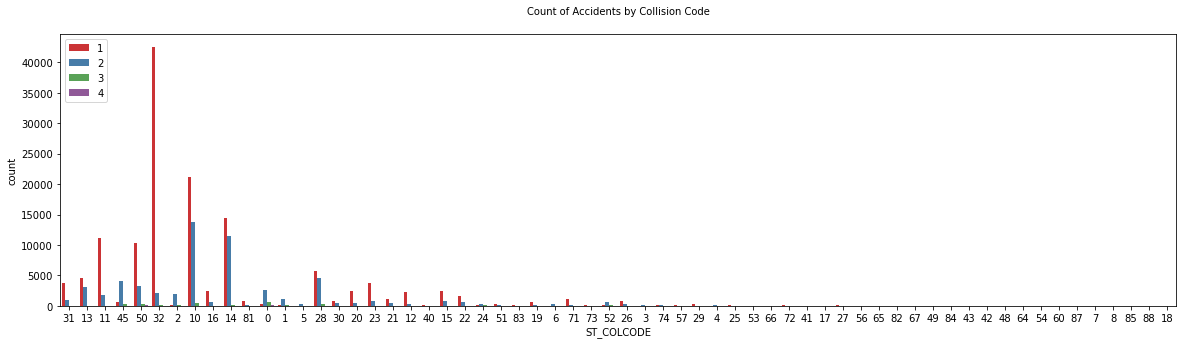

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(x='ST_COLCODE', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Collision Code', size=10, y=1.05)
plt.legend(loc='upper left', prop={'size': 10})
plt.show()

### Inspect Injuries, Serious Injuries and Fatalitites Features

There are three variables: Injuries, Serious injuries and Fatalities. Let us see how the numbers are distributed amongst the four severity codes we have.

In [48]:
df.groupby(
     ['SEVERITYCODE']
 ).agg(
     sum_INJURIES =            ('INJURIES','sum'),
     sum_SERIOUSINJURIES =     ('SERIOUSINJURIES','sum'),
     sum_FATALITIES =          ('FATALITIES','sum'),
 ).reset_index()

,SEVERITYCODE,sum_INJURIES,sum_SERIOUSINJURIES,sum_FATALITIES
0,1,0,0,0
1,2,77939,0,0
2,3,4396,3248,0
3,4,288,103,372


The matrix is indicating a very strong correlation with severity.

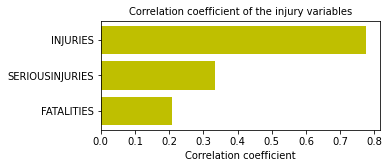

In [49]:
x_cols = [col for col in df.columns if col not in ['SEVERITYCODE'] if ((col =='INJURIES') or (col == 'SERIOUSINJURIES')
                                                                       or (col == 'FATALITIES'))]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df['SEVERITYCODE'].values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,2))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient", fontsize=10)
ax.set_title("Correlation coefficient of the injury variables", fontsize=10)
plt.show()

Since, apart from Severity Code = 1 ("Property Damage Only Collision"), Severity code is assigned based on the injury level, the former is a direct reflection of the latter. If we use injury features as predictors, it is easly seen that those will overwhelm the other features, and the prediction will be based on the after-effects of a collision. Therefore, these three features will be ignored.

### Pedestrian ROW (Right Of Way) not granted, Speeding and Inattention indicator (PEDROWNOTGRNT, SPEEDING and INATTENTIONIND) Variables

These variables have missing values which are substituted by 'Unknown'.

In [50]:
df['PEDROWNOTGRNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

NaN    0.97399
Y      0.02601
Name: PEDROWNOTGRNT, dtype: float64

In [51]:
df.replace({'PEDROWNOTGRNT' : {np.nan: 'N'}}, inplace=True)

In [52]:
df['SPEEDING'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

NaN    0.95035
Y      0.04965
Name: SPEEDING, dtype: float64

In [53]:
df.replace({'SPEEDING' : {np.nan: 'N'}}, inplace=True)

In [54]:
df['INATTENTIONIND'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

NaN    0.84861
Y      0.15139
Name: INATTENTIONIND, dtype: float64

In [55]:
df.replace({'INATTENTIONIND' : {np.nan: 'N'}}, inplace=True)

### Person Count, Pedestrian Count, Pedestrian Cycle Count and Vehicle Count (PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT and VEHCOUNT) variables

In [56]:
df['PERSONCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5).head()

2    0.58620
3    0.18274
4    0.07515
1    0.06828
5    0.03398
Name: PERSONCOUNT, dtype: float64

Since the Person Count has a long list, we can consider the top few values only, and assign the rest of the codes to a category 'Other'.

In [57]:
df['PEDCYLCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

0    0.97001
1    0.02974
2    0.00026
Name: PEDCYLCOUNT, dtype: float64

In [58]:
df['PEDCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

0    0.95959
1    0.03884
2    0.00137
3    0.00014
4    0.00005
5    0.00001
6    0.00001
Name: PEDCOUNT, dtype: float64

In [59]:
df['VEHCOUNT'].value_counts(normalize=True, ascending=False,dropna=False).round(5).head()

2    0.75220
1    0.13946
3    0.06688
0    0.02483
4    0.01260
Name: VEHCOUNT, dtype: float64

## Grouping junction type and collision type with severity code (Sunburst Plot) 

In [84]:
import plotly.express as px

df1 = df.copy()

fig = px.sunburst(
    data_frame=df1,
    path= ["SEVERITYCODE",'JUNCTIONTYPE',"COLLISIONTYPE"],                        
    branchvalues="total",
    title="Breakdown of collision type, junction type by severity code",
)
fig.update_traces(textinfo='label+percent entry') # percent parent
fig.update_layout(margin=dict(t=50, b=0, r=0, l=0),
                  width=700, height=700)
fig.show()

## Mode values of the features

It will be interesting to see the mode (highest frequency) values of each feature with respect to the severity codes.

In [85]:
# Target variable
target='SEVERITYCODE'

all_cols = ['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE', 
            'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 
            'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 
            'ST_COLCODE', 'HITPARKEDCAR']

df = df.loc[:, all_cols] 

df_sev_1 = df.loc[df[target] == 1]
df_sev_1 = df_sev_1.drop(target, axis=1)
df_sev_1 = df_sev_1.mode().T
new_header = ['Mode (S = 1)']
df_sev_1 = df_sev_1.iloc[:, 0]           
df_sev_1.columns = [new_header]

df_sev_2 = df.loc[df[target] == 2]
df_sev_2 = df_sev_2.drop(target, axis=1)
df_sev_2 = df_sev_2.mode().T
new_header = ['Mode (S = 2)']
df_sev_2 = df_sev_2.iloc[:, 0]            
df_sev_2.columns = new_header

df_sev_3 = df.loc[df[target] == 3]
df_sev_3 = df_sev_3.drop(target, axis=1)
df_sev_3 = df_sev_3.mode().T
new_header = ['Mode (S = 3)']
df_sev_3 = df_sev_3.iloc[:, 0]          
df_sev_3.columns = new_header

df_sev_4 = df.loc[df[target] == 3]
df_sev_4 = df_sev_4.drop(target, axis=1)
df_sev_4 = df_sev_4.mode().T
new_header = ['Mode (S = 4)']
df_sev_4 = df_sev_4.iloc[:, 0]            
df_sev_4.columns = new_header

df_res = pd.concat([df_sev_1, df_sev_2, df_sev_3, df_sev_4], axis=1)
df_res = df_res.set_axis(['Mode (S = 1)', 'Mode (S = 2)', 'Mode (S = 3)', 'Mode (S = 4)'], axis=1, inplace=False)
df_res

,Mode (S = 1),Mode (S = 2),Mode (S = 3),Mode (S = 4)
ADDRTYPE,Block,Block,Intersection,Intersection
COLLISIONTYPE,Parked Car,Rear Ended,Pedestrian,Pedestrian
JUNCTIONTYPE,Mid-Block (Not Intersect),At Intersection (Intersect),At Intersection (Intersect),At Intersection (Intersect)
INATTENTIONIND,N,N,N,N
UNDERINFL,N,N,N,N
WEATHER,Clear,Clear,Clear,Clear
ROADCOND,Dry,Dry,Dry,Dry
LIGHTCOND,Daylight,Daylight,Daylight,Daylight
PEDROWNOTGRNT,N,N,N,N
SPEEDING,N,N,N,N


In [86]:
filename = "Collisions_100_after_EDA_unbalanced.csv"
df.to_csv(filename, index=False)

# Feature Selection

In [87]:
filename = "Collisions_100_after_EDA_unbalanced.csv"
df = pd.read_csv(filename)

In [88]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('category')

Select Features of interest and one-hot encode them.

In [89]:
#features = ['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 
#            'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 
#            'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 
#            'ST_COLCODE', 'HITPARKEDCAR', 'Month', 'Weekday', 'Hour']

all_cols = ['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE', 
            'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 
            'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 
            'ST_COLCODE', 'HITPARKEDCAR']

all_features = ['ADDRTYPE','COLLISIONTYPE',
            'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 
            'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 
            'ST_COLCODE', 'HITPARKEDCAR']

df_sel = df.loc[:, all_cols]    
df_sel[all_features] = df_sel[all_features].astype('category')
df_sel = pd.get_dummies(df_sel, columns=all_features, drop_first=True, dtype='int64')

df_sel.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,COLLISIONTYPE_Unknown,JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (Intersect),JUNCTIONTYPE_Mid-Block (Not Intersect),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,INATTENTIONIND_Y,UNDERINFL_Unknown,UNDERINFL_Y,WEATHER_Blowing Snow,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,PEDROWNOTGRNT_Y,SPEEDING_Y,ST_COLCODE_1,ST_COLCODE_2,ST_COLCODE_3,ST_COLCODE_4,ST_COLCODE_5,ST_COLCODE_6,ST_COLCODE_7,ST_COLCODE_8,ST_COLCODE_10,ST_COLCODE_11,ST_COLCODE_12,ST_COLCODE_13,ST_COLCODE_14,ST_COLCODE_15,ST_COLCODE_16,ST_COLCODE_17,ST_COLCODE_18,ST_COLCODE_19,ST_COLCODE_20,ST_COLCODE_21,ST_COLCODE_22,ST_COLCODE_23,ST_COLCODE_24,ST_COLCODE_25,ST_COLCODE_26,ST_COLCODE_27,ST_COLCODE_28,ST_COLCODE_29,ST_COLCODE_30,ST_COLCODE_31,ST_COLCODE_32,ST_COLCODE_40,ST_COLCODE_41,ST_COLCODE_42,ST_COLCODE_43,ST_COLCODE_45,ST_COLCODE_48,ST_COLCODE_49,ST_COLCODE_50,ST_COLCODE_51,ST_COLCODE_52,ST_COLCODE_53,ST_COLCODE_54,ST_COLCODE_56,ST_COLCODE_57,ST_COLCODE_60,ST_COLCODE_64,ST_COLCODE_65,ST_COLCODE_66,ST_COLCODE_67,ST_COLCODE_71,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88,HITPARKEDCAR_Y
0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop ALL the columns having 'Unknown' in their titles.

In [90]:
df_sel.drop(df_sel.columns[df_sel.columns.str.contains('Unknown')], axis=1, inplace=True)

In [91]:
# Check if all the data types are int64 or not

df.select_dtypes(exclude=['int64'])

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Unknown,At Intersection (Intersect),N,Unknown,Unknown,Unknown,Unknown,N,N,N
1,2,Block,Unknown,Mid-Block (Not Intersect),N,Unknown,Unknown,Unknown,Unknown,N,N,N
2,1,Intersection,Rear Ended,At Intersection (Intersect),N,N,Clear,Dry,Daylight,N,N,N
3,1,Block,Sideswipe,Mid-Block (Not Intersect),N,N,Clear,Dry,Daylight,N,N,N
4,2,Intersection,Cycles,At Intersection (Intersect),N,N,Clear,Dry,Unknown,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
199399,1,Intersection,Angles,At Intersection (Intersect),N,N,Clear,Dry,Dark - Street Lights On,N,Y,N
199400,1,Block,Other,Mid-Block (Not Intersect),N,N,Clear,Dry,Dark - Street Lights On,N,N,N
199401,1,Block,Other,Mid-Block (Not Intersect),N,N,Clear,Dry,Dark - Street Lights On,N,N,N
199402,1,Block,Parked Car,Mid-Block (Not Intersect),N,N,Clear,Dry,Daylight,N,N,N


In [92]:
filename = "Collisions_100_after_Feature_Selected_unbalanced.csv"
df_sel.to_csv(filename, index=False)

# Classification Models for Multi-class, Skewed Distribution

Although we know a priori, that this extremely skewed and multi-class data may not be amenable even to the specialized classification models that deal with unbalanced data, we go ahead and have a taste of their performance, nevertheless. Here we have chosen 
- Bagging
- Balanced Bagging
- Balanced Random Forest
- EasyEnsemble classifiers 

that are capable to deal with unbalanced data inherently.

In [93]:
filename = "Collisions_100_after_Feature_Selected_unbalanced.csv"
df = pd.read_csv(filename)

In [94]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# --------------------------------------------------------------------------------
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT
# --------------------------------------------------------------------------------
def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
# --------------------------------------------------------------------------------
# --------------------------------------------------------------------------------

#### Train Test Split
Split the data into X_train, X_test, y_train, and y_test, after standardising the input features.

In [95]:
# Target variable
target='SEVERITYCODE'

# set X and y
y = df[target]
X = df.drop(target, axis=1)

X = StandardScaler().fit(X).transform(X)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

We generate the confusion matrices along with the blanced accuracy scores for the four chosen models.

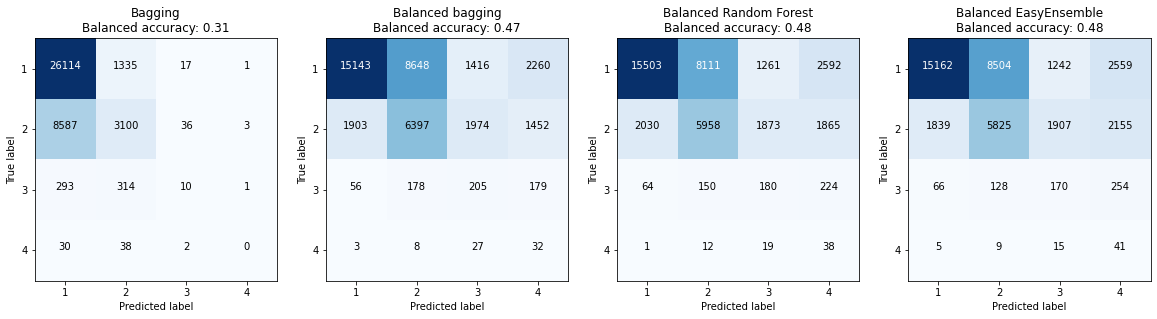

In [96]:
bagging = BaggingClassifier(n_estimators=50, random_state=0, n_jobs=-1)
balanced_bagging = BalancedBaggingClassifier(n_estimators=50, random_state=0, n_jobs=-1)
brf = BalancedRandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)
eec = EasyEnsembleClassifier(n_estimators=10, n_jobs=-1)

bagging.fit(X_train, y_train)
balanced_bagging.fit(X_train, y_train)
brf.fit(X_train, y_train)
eec.fit(X_train, y_train)

y_pred_bc = bagging.predict(X_test)
y_pred_bbc = balanced_bagging.predict(X_test)
y_pred_brf = brf.predict(X_test)
y_pred_eec = eec.predict(X_test)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

cm_bagging = confusion_matrix(y_test, y_pred_bc)
plot_confusion_matrix(cm_bagging, classes=np.unique(df[target]), ax=ax[0],
                      title='Bagging\nBalanced accuracy: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred_bc)))

cm_balanced_bagging = confusion_matrix(y_test, y_pred_bbc)
plot_confusion_matrix(cm_balanced_bagging, classes=np.unique(df[target]), ax=ax[1],
                      title='Balanced bagging\nBalanced accuracy: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred_bbc)))

cm_brf = confusion_matrix(y_test, y_pred_brf)
plot_confusion_matrix(cm_brf, classes=np.unique(df[target]), ax=ax[2],
                      title='Balanced Random Forest\nBalanced accuracy: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred_brf)))

cm_eec = confusion_matrix(y_test, y_pred_eec)
plot_confusion_matrix(cm_eec, classes=np.unique(df[target]), ax=ax[3],
                      title='Balanced EasyEnsemble\nBalanced accuracy: {:.2f}'.format(balanced_accuracy_score(y_test, y_pred_eec)))

plt.show()

We see that in all the four cases, balanced accuracy did not even cross 50%.

# Balancing

In [97]:
filename = "Collisions_100_after_Feature_Selected_unbalanced.csv"
df = pd.read_csv(filename)

To see the skewness, let's take a percent counts for each Severity Code:

In [98]:
df['SEVERITYCODE'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

1    0.68873
2    0.29402
3    0.01551
4    0.00175
Name: SEVERITYCODE, dtype: float64

## Multi-class to Two-class

Often times, the skewed multi-class classification problem is converted to the two-class problem by taking the minority class versus the addition of the rest of the classes. In our situation, the accidents with severity level 4 are fatal and others are non-fatal. Therefore, we can focus on level 4 accidents and regroup the levels of severity into level 4 versus other levels. In this process, a new column 'Severity 4' is created.

In [99]:
df['Severity 4'] = 0
df.loc[df['SEVERITYCODE'] == 4, 'Severity 4'] = 1
df['Severity 4'].value_counts()

0    199055
1       349
Name: Severity 4, dtype: int64

### Balancing Severity (Resampling)

As seen above, Severity 4 is extremely rare, or in other words, the data is highly skewed. The main challenge of dealing with this type of data is that the machine learning algorithms train with almost 100% accuracy and fails to classify the minority class. This is intuitive since when the occurrence of the majority class is 99% per cent, even if the classifier is hard-coded to predict majority class always, the accuracy will still be 99%. 
We appreciate that false negative is very costly here, that is actual severity code 4 is not predicted. The situation is just like the detection of fraudulent transactions or diagnosing diseases.
There are many ways to deal with this situation by balancing the data synthetically by exploration method before training. We might 

(1) under-sample the majority class

(2) over-sample the minority class or

(3) have a combination of (1) and (2), i.e. over- and under-sample simultaneously.

The combination of over- and under-sampling will be used since the data is large enough. level 4 will be randomly over-sampled to 10000 and other levels will be randomly under-sampled to 10000.

In [100]:
df = pd.concat([df[df['Severity 4']==1].sample(10000, replace = True),
                   df[df['Severity 4']==0].sample(10000)], axis=0)
print('Resampled data:', df['Severity 4'].value_counts())

Resampled data: 1    10000
0    10000
Name: Severity 4, dtype: int64


In [101]:
df['Severity 4'].value_counts(normalize=True, ascending=False, dropna=False).round(5)

1    0.5
0    0.5
Name: Severity 4, dtype: float64

We see that 50% of Severity Code is 1, and rest 50% has value 0

Now, drop 'SEVERITYCODE'.

In [102]:
df.drop(['SEVERITYCODE'], axis=1, inplace=True)

In [103]:
filename = "Collisions_100_after_Feature_Selected_balanced.csv"
df.to_csv(filename,index=False)

# Correlation

Let us now get an idea of how the variables are correlated (except ST_COLCODE, as it contains a very long list of codes).

In [104]:
filename = "Collisions_100_after_Feature_Selected_balanced.csv"
df = pd.read_csv(filename)

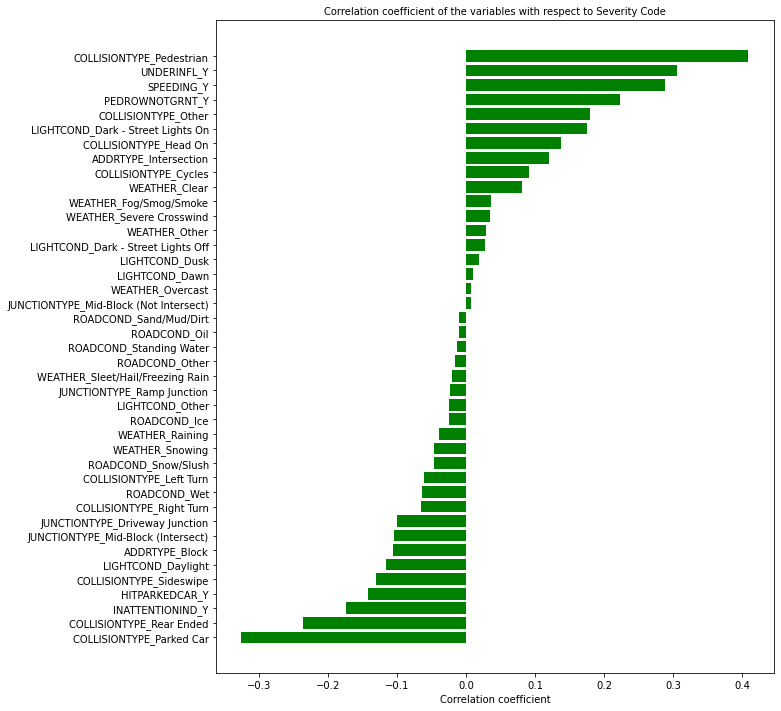

In [105]:
import math
import warnings

warnings.simplefilter(action='ignore', category=Warning)

df_sel = df.drop(df.columns[df.columns.str.contains('ST_COLCODE')], axis=1)

x_cols = [col for col in df_sel.columns if col not in ['Severity 4'] if (df[col].dtype=='int64')]

labels = []
values = []
for col in x_cols:
    if not (math.isnan(np.corrcoef(df_sel[col].values, df_sel['Severity 4'].values)[0,1])):
        labels.append(col)
        values.append(np.corrcoef(df_sel[col].values, df_sel['Severity 4'].values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,12))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='g')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient", fontsize=10)
ax.set_title("Correlation coefficient of the variables with respect to Severity Code", fontsize=10)
plt.show()

# Comparison of Different Classification Models

In [106]:
filename = "Collisions_100_after_Feature_Selected_balanced.csv"
df = pd.read_csv(filename)

In [107]:
from sklearn import preprocessing

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#### Train Test Split
Split the data into X_train, X_test, y_train, and y_test, after standardising the input features.

In [108]:
# Target variable
target='Severity 4'

# set X and y
y = df[target]
X = df.drop(target, axis=1)

X = preprocessing.StandardScaler().fit(X).transform(X)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# List of classification algorithms
algorithm_list=['Logistic Regression', 'k-Nearest Neighbors', 'Decision Trees', 'Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_list=[]

## Logistic Regression
Logistic regression is employed as a baseline to perform binary classification task.

In [109]:
# Logistic regression with default setting.
from sklearn.linear_model import LogisticRegression

# Classifier Model = Logistic Regression
lreg_clf = LogisticRegression(max_iter=10000, random_state=42)

lreg_clf.fit(X_train, y_train)

lreg_accuracy_train = lreg_clf.score(X_train, y_train)
print("Training Accuracy: %.1f%%"% (lreg_accuracy_train*100))

lreg_accuracy_test = lreg_clf.score(X_test, y_test)
print("Testing Accuracy: %.1f%%"% (lreg_accuracy_test*100))

Training Accuracy: 85.0%
Testing Accuracy: 84.3%


In [110]:
#Grid Search
from sklearn.model_selection import GridSearchCV

LR_grid = {
           'C':        [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
           'max_iter': [1000, 10000, 100000]
          }

lr_cv = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid = LR_grid, scoring = 'accuracy', cv = 5)

lr_cv.fit(X_train, y_train)
print('Best Parameters: ', lr_cv.best_params_)

Best Parameters:  {'C': 1, 'max_iter': 1000}


In [111]:
%%time
from sklearn.metrics import confusion_matrix, accuracy_score

# Classifier Model = Logistic Regression
lreg_clf = LogisticRegression(C=5, max_iter=1000, penalty='l2')

lreg_clf.fit(X_train, y_train)

lreg_accuracy_train = lreg_clf.score(X_train, y_train)
print("Training Accuracy: %.1f%%"% (lreg_accuracy_train*100))

lreg_accuracy_test = lreg_clf.score(X_test, y_test)
print("Testing Accuracy: %.1f%%"% (lreg_accuracy_test*100))

# Append to the accuracy list
accuracy_list.append(lreg_accuracy_test)

Training Accuracy: 85.1%
Testing Accuracy: 84.3%
Wall time: 492 ms


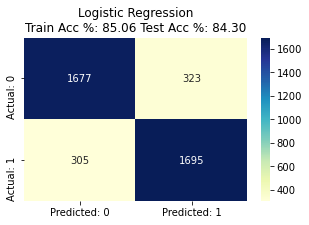

In [112]:
from sklearn.metrics import confusion_matrix

y_pred = lreg_clf.predict(X_test)

lreg_cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

df_conf = pd.DataFrame(data=lreg_cm, columns=['Predicted: 0','Predicted: 1'], index=['Actual: 0','Actual: 1'])

plt.figure(figsize = (5,3))

sns.heatmap(df_conf, annot=True, fmt='d', cmap="YlGnBu").set_title(
            "Logistic Regression\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                lreg_accuracy_train*100, lreg_accuracy_test*100), fontsize=12)

plt.show()

## K Nearest Neighbor (kNN)

In [113]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=7)

knn_clf.fit(X_train, y_train)

knn_accuracy_train = knn_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (knn_accuracy_train*100))

knn_accuracy_test = knn_clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (knn_accuracy_test*100))

# Append to the accuracy list
accuracy_list.append(knn_accuracy_test)

Train Accuracy: 90.2%
Test Accuracy: 88.5%


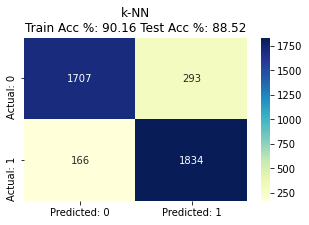

In [114]:
from sklearn.metrics import confusion_matrix

y_pred = knn_clf.predict(X_test)

knn_cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

df_conf = pd.DataFrame(data=knn_cm, columns=['Predicted: 0','Predicted: 1'], index=['Actual: 0','Actual: 1'])

plt.figure(figsize = (5,3))
sns.heatmap(df_conf, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "k-NN\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                knn_accuracy_train*100, knn_accuracy_test*100), fontsize=12)
plt.show()

## Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DT_grid = {'min_samples_split': [5, 10, 20, 30], 
           'max_features': [None, 'log2', 'sqrt']}

CV_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), DT_grid, verbose=1, cv=3)
CV_DT.fit(X_train, y_train)

print('Best Parameters: ', CV_DT.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:  {'max_features': 'log2', 'min_samples_split': 10}


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.3s finished


In [116]:
%%time
from sklearn import tree

# Training step, on X_train with y_train
tree_clf = tree.DecisionTreeClassifier(min_samples_split = 10, max_features = 'log2', 
                                       class_weight='balanced', random_state=42)
tree_clf = tree_clf.fit(X_train, y_train)

tree_accuracy_train = tree_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (tree_accuracy_train*100))

tree_accuracy_test = tree_clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (tree_accuracy_test*100))

# Append to the accuracy list
accuracy_list.append(tree_accuracy_test)

Train Accuracy: 92.3%
Test Accuracy: 90.8%
Wall time: 52.9 ms


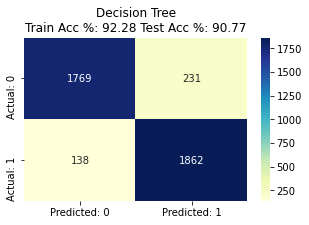

In [117]:
y_pred = tree_clf.predict(X_test)

tree_cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

df_conf = pd.DataFrame(data=tree_cm, columns=['Predicted: 0','Predicted: 1'], index=['Actual: 0','Actual: 1'])

plt.figure(figsize=(5, 3))
sns.heatmap(df_conf, annot=True, fmt='d',cmap="YlGnBu").set_title(
    "Decision Tree\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                tree_accuracy_train*100, tree_accuracy_test*100), fontsize=12)
plt.show()

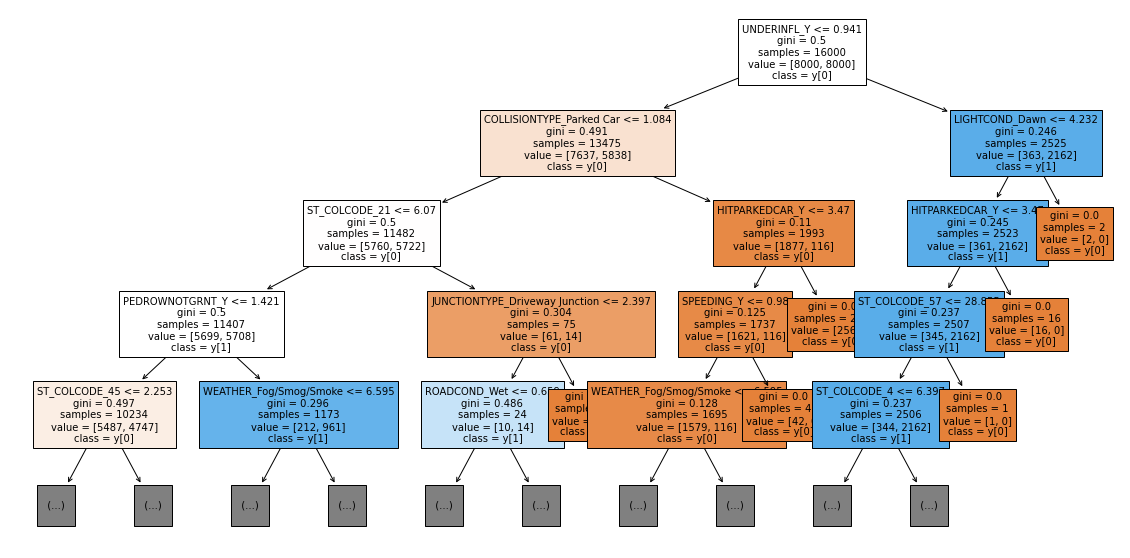

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(tree_clf, max_depth=4, fontsize=10,
               feature_names=df.drop('Severity 4', axis=1).columns.to_list(), class_names=True, filled=True)
plt.show()

## Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid ={'bootstrap': [True, False],
 'max_depth': [5, 10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 20, 30]
            }

CV_RF = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,cv=4)
CV_RF.fit(X_train, y_train)
print('Best Parameters: ', CV_RF.best_params_)

Best Parameters:  {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 30}


In [120]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt', n_estimators=30, random_state=42)
rf_clf.fit(X_train,y_train)

f = lambda x: 1 if x>=0.5 else 0
train_pred = np.array(list(map(f, rf_clf.predict(X_train))))
test_pred = np.array(list(map(f, rf_clf.predict(X_test))))

rf_train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy: %.1f%%"% (rf_train_accuracy*100))

rf_test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy: %.1f%%"% (rf_test_accuracy*100))

# Append to the accuracy list
accuracy_list.append(rf_test_accuracy)

Train Accuracy: 92.3%
Test Accuracy: 91.0%
Wall time: 755 ms


Random Forest and Decision Tree have similar accuracy.

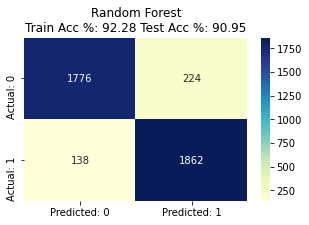

In [121]:
rf_cm = confusion_matrix(y_true=y_test, y_pred=test_pred)

df_conf = pd.DataFrame(data=rf_cm, columns=['Predicted: 0','Predicted: 1'], index=['Actual: 0','Actual: 1'])

plt.figure(figsize = (5, 3))
sns.heatmap(df_conf, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Random Forest\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                rf_train_accuracy*100, rf_test_accuracy*100), fontsize=12)
plt.show()

# Model Evaluation

Plot the Accuracy vs Algorithm

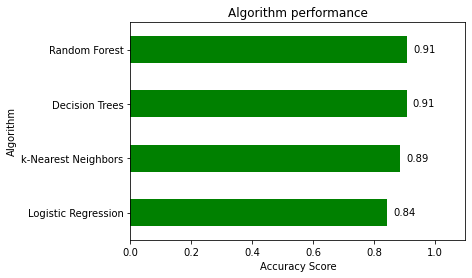

In [122]:
# Generate a list of ticks for y-axis
y_ticks = np.arange(len(algorithm_list))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_accuracy = pd.DataFrame(list(zip(algorithm_list, accuracy_list)), 
                    columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'], ascending = True)

# Make a plot
ax = df_accuracy.plot.barh('Algorithm', 'Accuracy_Score', align='center', legend=False, color='g')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0, 1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_accuracy['Algorithm'], rotation=0)
plt.title('Algorithm performance')

plt.show()

Show confusion matrices side by side.

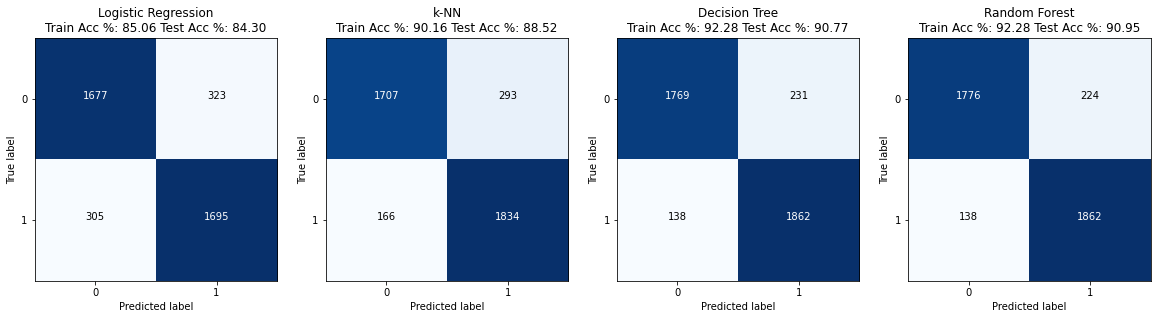

In [123]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

plot_confusion_matrix(lreg_cm, classes=np.unique(df[target]), ax=ax[0],
                      title="Logistic Regression\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                      lreg_accuracy_train*100, lreg_accuracy_test*100))

plot_confusion_matrix(knn_cm, classes=np.unique(df[target]), ax=ax[1],
                      title="k-NN\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                             knn_accuracy_train*100, knn_accuracy_test*100))

plot_confusion_matrix(tree_cm, classes=np.unique(df[target]), ax=ax[2],
                      title="Decision Tree\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                      tree_accuracy_train*100, tree_accuracy_test*100))

plot_confusion_matrix(rf_cm, classes=np.unique(df[target]), ax=ax[3],
                      title="Random Forest\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                      rf_train_accuracy*100, rf_test_accuracy*100))


plt.show()

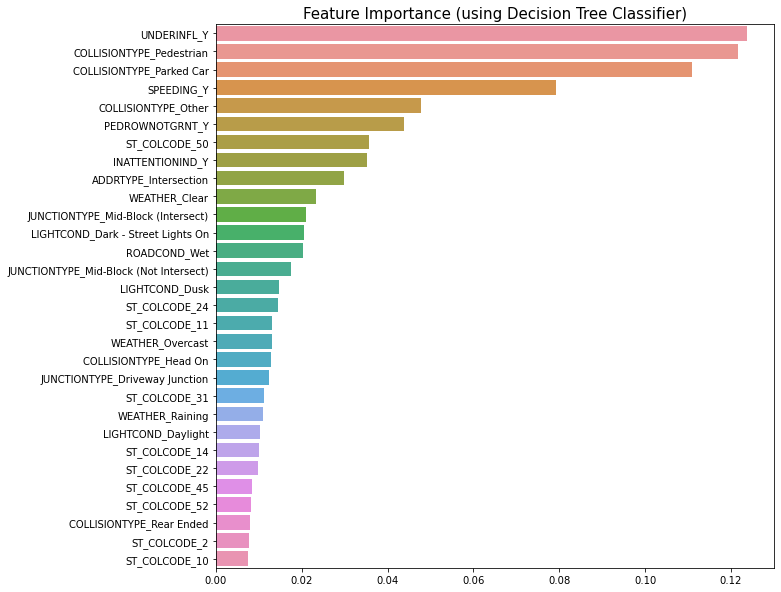

In [124]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], 
                           index=df.drop('Severity 4',axis=1).columns)

importances.iloc[:,0] = tree_clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importancestop = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importancestop.index, data=importancestop)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Feature Importance (using Decision Tree Classifier)', size=15)

plt.show()

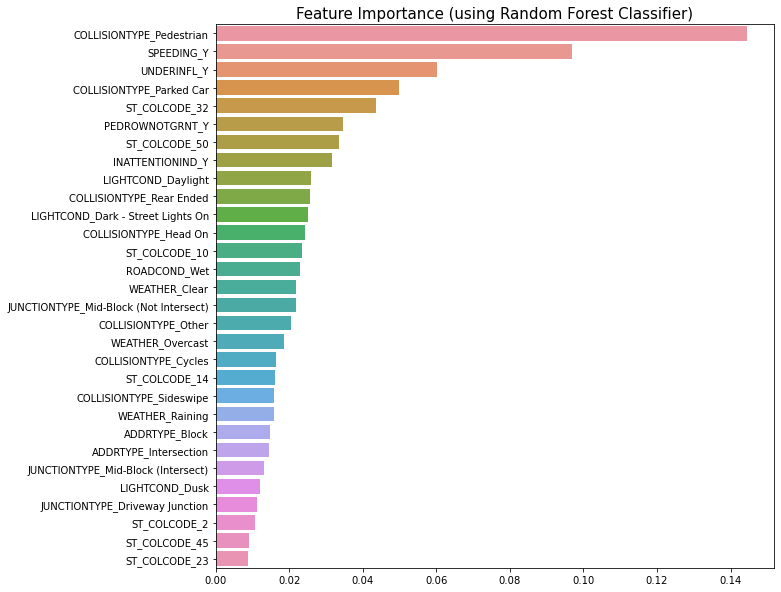

In [125]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=df.drop('Severity 4',axis=1).columns)

importances.iloc[:,0] = rf_clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importancestop = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importancestop.index, data=importancestop)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Feature Importance (using Random Forest Classifier)', size=15)

plt.show()

We can conclude that the Random Forest is the best model in this scenario (Decision Tree is the second best, but very close to Random Forest). An interesting point to note here is that the top important features are somewhat different between Random Forest and the Decision Tree models. 

# Inference

Following the Random Forest model, we see that special attention needs to be given to pedestrians (topmost important feature), speeding, collision with a parked car, rear-ended collision, under influence. The collision codes 50 (Struck Fixed Object), 32 (One Parked - One Moving), 10 (Entering At Angle) are the most frequent ones.

# Future Study

- The relations between the key features and accident severity can be further studied in details
- Different data balancing techniques can be applied and evaluated
- Development of a much more complex real-time accident risk prediction model

# END